<a href="https://colab.research.google.com/github/chrishuskey/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Assignment_U1_S3_M2_(Week_3%2C_Day_2)_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
# Import libraries used in this notebook:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mean_custom(numbers):
  return sum(numbers) / len(numbers)

In [0]:
def variance_custom(numbers, dof=1):
  numbers = np.array(numbers, dtype='float')
  if dof == 1:
    # Return sample variance:
    return np.var(numbers, ddof=1)  # [?? To do: Replace with custom function ??]
  elif dof == 0:
    # Return population variance:
    return np.var(numbers, ddof=0)  # [?? To do: Replace with custom function ??]
  else:
    return None

In [0]:
def std_dev_custom (numbers, dof=1):
  if dof == 1:
    # Return sample standard deviation:
    return sqrt(variance_custom(numbers, dof=1))
  elif dof == 0:
    # Return population std. dev.:
    return sqrt(variance_custom(numbers, dof=0))
  else:
    return None

In [107]:
# Get and print sales summary stats for last week:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

print('Sales Last Week:\n')
print('Total: $', np.sum(sales))
print('Mean: $', round(mean_custom(sales), 2))
print('Variance:', round(variance_custom(sales, dof=1), 2), '(in US$^2)')
print('Standard deviation: $', round(std_dev_custom(sales, dof=1), 2))

# Check answers:
assert mean_custom(sales) == np.mean(sales)
assert variance_custom(sales, dof=1) == np.var(sales, ddof=1)
assert std_dev_custom(sales, dof=1) == np.std(sales, ddof=1)

Sales Last Week:

Total: $ 21369
Mean: $ 3052.71
Variance: 214387.9 (in US$^2)
Standard deviation: $ 463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])

In [148]:
# Make Pandas dataframe with our sales and customers data:
sales_df = pd.DataFrame(sales, columns=['sales'])
sales_df['customers'] = customers  
# [?? There must be a way to do the above in 1 line instead of 2, while still starting with numpy arrays?  But can't figure it out bc of numpy transpose issue (except rewriting [] around every data point by hand to make it a column array, which doesn't scale...)... ??]

# Find covariance and correlation coefficient:
covar_matrix = sales_df.cov()  # Get covariance matrix
corr_matrix = sales_df.corr()  # Get matrix with correlation coefficient

# Print answer:
print("Last Week: # of Customers in Our Physical Stores <-> Total Sales Revenue:\n")
print("Correlation: r =", round(corr_matrix.loc['sales', 'customers'], 2))
print("Covariance:", round(covar_matrix.loc['sales', 'customers'], 2))

Last Week: # of Customers in Our Physical Stores <-> Total Sales Revenue:

Correlation: r = 0.96
Covariance: 7604.36


In [151]:
# By hand:  Calculate covariance of sales and # customers manually, and 
# compare to pandas result from above:
covar_by_hand = sales_df.copy()
covar_by_hand['sales_diff'] = covar_by_hand['sales'] - covar_by_hand['sales'].mean()
covar_by_hand['cust_diff'] = covar_by_hand['customers'] - covar_by_hand['customers'].mean()
covar_by_hand['multiplied'] = covar_by_hand['sales_diff'] * covar_by_hand['cust_diff']

covar_manual = covar_by_hand['multiplied'].sum() / (len(covar_by_hand) - 1)
print('Covariance (calculated manually):\n r = ', round(covar_manual, 2))

# Check answer:
assert round(covar_manual, 10) == round(covar_matrix.loc['sales', 'customers'], 10)

Covariance (calculated manually):
 r =  7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [152]:
sales_std_dev = np.std(sales, ddof=1)
customers_std_dev = np.std(customers, ddof=1)
print('Standard deviation in # of offline/physical customers per day:\n', 
        round(customers_std_dev, 2), 'customers')

Standard deviation in # of offline/physical customers per day:
 17.06 customers


In [154]:
# Calculate the correlation coefficient r manually, and compare with comp. calc. from above:
corr_manual = covar_matrix.loc['sales', 'customers'] / (sales_std_dev * customers_std_dev)
print('Correlation between # of physical/offline customers and total sales revenue:\n r = ', 
        round(corr_manual, 2))

# Check answer vs. comp. calc in 1.2 above:
assert round(corr_manual, 10) == round(corr_matrix.loc['sales', 'customers'], 10)

Correlation between # of physical/offline customers and total sales revenue:
 r =  0.96


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# Import the Titanic dataset and create a Pandas dataframe with the data:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', 
                            index_col=0)

In [0]:
# Data prep.:

# Add 0/1 numerical column for gender (categorical data), so we can work with it:
titanic_df['is_female'] = titanic_df['sex'].replace({'female': 1, 'male': 0})  # Q:  Why do boolean values work with pd.corr(), but make pd.cov() fail (return an error)?  e.g., if I use titanic_df['is_female'] = titanic_df['sex'] == 'female' instead of replacing with 0/1 in this line --> titanic_df.cov() fails, while .corr() still works. ??]

# Drop columns that are both irrelevant and have a ton (>40%) of missing (NaN) 
# values, because we don't need them for this exercise:
titanic_df = titanic_df.drop(columns=['cabin', 'boat', 'body', 'home.dest'])

# Many of the other columns have 1-2 NaN values (out of 1310 rows), so let's 
# just drop those few rows completely:
titanic_df = titanic_df.dropna()

In [226]:
# Covariance matrix for numerical columns (all except name, sex, ticket, embarked):
cov_matrix_2 = titanic_df.cov()
cov_matrix_2

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,is_female
pclass,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062,-0.049857
survived,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387,0.123080
age,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661,-0.346127
sibsp,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036,0.054595
parch,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260,0.088325
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961,4.600321
has_cabin_number,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803,0.027468
is_female,-0.049857,0.123080,-0.346127,0.054595,0.088325,4.600321,0.027468,0.229517


In [227]:
# Correlation coefficients matrix for numerical columns:
corr_matrix_2 = titanic_df.corr()
corr_matrix_2

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,is_female
pclass,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783,-0.124198
survived,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031,0.528483
age,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520,-0.056180
sibsp,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264,0.109369
parch,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629,0.212934
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253,0.185523
has_cabin_number,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000,0.137134
is_female,-0.124198,0.528483,-0.056180,0.109369,0.212934,0.185523,0.137134,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

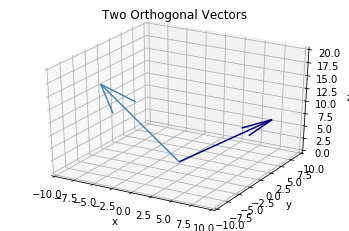

In [315]:
# Find orthogonal vectors:  If we pick v1 = [7, 9, 6] and v2 = [-5, -8, x] 
# (numbers in different directions that should show better on graph), then to 
# get v1 · v2 = 0 (--> orthogonal vectors), v2  must = [-5, -8, 107/6].
v1 = np.array([7, 9, 6])
v2 = np.array([-5, -8, 107/6])

# Plot them so we can see:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection='3d')
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='navy')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='steelblue')
ax.set_title('Two Orthogonal Vectors')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Check (visual):  Yup, these look like they could be orthogonal vectors!

# Answer:  Orthogonal means "perpendicular" in however many dimensions the 
# vectors span (i.e., not necessarily in 2D -- the vectors could form a right 
# angle in 3D or more D only, but might not in 2D if squished to projections in 2D.)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [252]:
v3 = np.array([-5, 3, 7])
v4 = np.array([6, -8, 2])

# If v3 · v4 = 0, which would be true if these two vectors are orthogonal.

# Answer:  No, these two vectors are not orthogonal, because their dot product 
# is (-30 -24 + 14) = -40, not 0.  Two vectors are orthogonal <- IFF -> (if and 
# only if) their dot product is zero.
print('No, these two vectors are not orthogonal, because:\n v3 · v4 =', 
        np.dot(v3, v4), ', not zero.')

No, these two vectors are not orthogonal, because:
 v3 · v4 = -40 , not zero.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [288]:
# By hand:
# Answer:  The above 3 are all equal.  ||v||^2 = v · v (the dot product of a 
# vector with itself equals its norm squared), and the product of a vector and 
# itself transposed into a column vector is by definition the same as the dot 
# product of that vector with itself (different ways of saying the same thing). 
# So the answers to the 2.3(i), 2.3(ii) and 2.3(iii) are the same: 665.  
# (Calc: = 2*2 + -15*-15 + 6*6 + 20*20)
c1 = np.array([2, -15, 6, 20])
c1_T = np.array([[2], [-15], [6], [20]])

# By computer (NumPy):
# Check that manual calcs above are true:  Yes, they are (no error returned).
assert np.dot(c1, c1) == np.linalg.norm(c1)**2 == np.matmul(c1, c1_T)[0] == np.matmul(c1, c1.transpose())

# Print answers:
print('What is ||c||^2?\n')
print(np.dot(c1, c1))

print('\nWhat is c · c?\n')
print(int(np.linalg.norm(c1)**2))

print('\nWhat is c_T(C)?\n')
print(np.matmul(c1, c1_T)[0])

print('\nCheck:  The above are all the same:')
print(np.dot(c1, c1) == np.linalg.norm(c1)**2 == np.matmul(c1, c1_T)[0] == np.matmul(c1, c1.transpose()))

What is ||c||^2?

665

What is c · c?

665

What is c_T(C)?

665

Check:  The above are all the same:
True


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

**Answer:**
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
\newline
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\\ 0 \end{bmatrix} - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [310]:
# To turn f into a unit vector (of magnitude 1), we divide each of its 
# components by its magnitude:
f1 = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f1)  # Calc: = sqrt(4**2 + 12**2 + 11**2 + 9**2 + 2**2)
f1_unit = f1 / f_norm  # this applies element-wise in NumPy
print('Resulting f unit vector:')
f1_unit

Resulting f unit vector:


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [311]:
print('Norm of resulting f unit vector:\n', round(np.linalg.norm(f1_unit), 10))

# Check answer:
assert 1 == round(np.linalg.norm(f1_unit), 10) == round(f1_unit[0]**2 + f1_unit[1]**2 + f1_unit[2]**2 + f1_unit[3]**2 + f1_unit[4]**2, 10)

Norm of resulting f unit vector:
 1.0


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Let's start with the vector [2, 5, 5] (arbitrarily selected numbers):
v5 = np.array([2, 5, 5])

# Linearly dependent vector: a scalar multiple of the first vector v5 
# --> colinear, linearly dependent
v6_dep = 3.5 * v5

# Linearly independent vector: orthogonal to vector v5 --> linearly independent.
# We arbitrarily select two numbers 4 and 1, and solve for the third:
# v7_indep = [4, 1, x]
# v5 and v7_indep are orthogonal <-IFF-> dot product = 0, so: 
# v5 · v7_indep = 2*4 + 5*1 + 5*x = 0  -->  x = -13/5, v7_indep = [4, 1, -13/5]
v7_indep = np.array([4, 1, -13/5])

# Check for orthogonality (and thus linear independence):
assert np.dot(v5, v7_indep) == 0

In [317]:
v5

array([2, 5, 5])

In [318]:
v6_dep

array([ 7. , 17.5, 17.5])

In [319]:
v7_indep

array([ 4. ,  1. , -2.6])

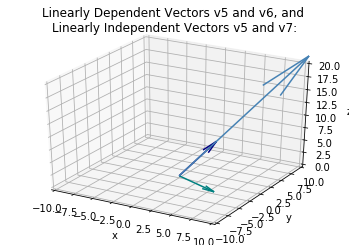

In [322]:
# Plot them so we can see:
# from mpl_toolkits.mplot3d import Axes3D  (already imported above)

fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection='3d')
ax.quiver(0, 0, 0, v5[0], v5[1], v5[2], color='navy')
ax.quiver(0, 0, 0, v6_dep[0], v6_dep[1], v6_dep[2], color='steelblue')
ax.quiver(0, 0, 0, n[0], v7_indep[1], v7_indep[2], color='teal')
ax.set_title('Linearly Dependent Vectors v5 and v6, and \nLinearly Independent Vectors v5 and v7:')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Check (visual):  
# Yes, these look right (v5 and v6 as colinear, v5 and v7 as orthogonal)!

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Answer:
  Vectors g and h are colinear --> linearly dependent 
 --> they only span 1 dimension, the line y = 2x.



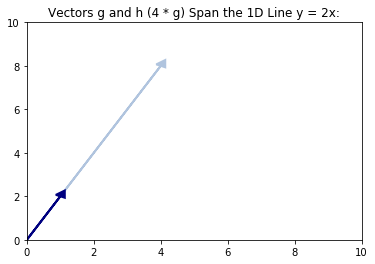

In [376]:
# Answer:  Vectors g and h are colinear --> linearly dependent --> they only span 
# 1 dimension, the line y = 2x.
g1 = np.array([1, 2])
h1 = np.array([4, 8])

print('Answer:\n  Vectors g and h are colinear --> linearly dependent \n --> they only span 1 dimension, the line y = 2x.\n')
# Check to confirm:
assert h1[0] == 4 * g1[0] and h1[1] == 4 * g1[1]

# Plot to show this visually:
plt.arrow(0, 0, h1[0], h1[1], linewidth=2, color='lightsteelblue', head_width=0.3, head_length=0.3)
plt.arrow(0, 0, g1[0], g1[1], linewidth=2, color='navy', head_width=0.3, head_length=0.3)
plt.title('Vectors g and h (4 * g) Span the 1D Line y = 2x:')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

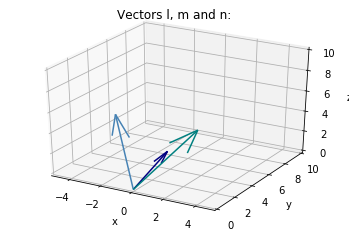

In [383]:
l1 = np.array([1, 2, 3])
m1 = np.array([-1, 0, 7])
n1 = np.array([4, 8, 2])

# Let's plot them and see if we can get a better sense of if they might be 
# linearly independent or not:
fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection='3d')
ax.quiver(0, 0, 0, l1[0], l1[1], l1[2], color='navy')
ax.quiver(0, 0, 0, m1[0], m1[1], m1[2], color='steelblue')
ax.quiver(0, 0, 0, n1[0], m1[1], m1[2], color='teal')
ax.set_title('Vectors l, m and n:')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Via Gaussian elimination (row reduction), we can see that our impression from the chart above was right: l, m and n are 3 linearly independent vectors.

First, we put them into a 3x3 matrix, as linear equations (without a solutions column):


\begin{align}
 matrix = \begin{bmatrix}
  1 & 2 & 3 \\
  -1 & 0 & 7 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

Which reduces via Gaussian Elimination all the way down to the below row reduced echelon form --> which means these 3 vectors are linearly independent:

\begin{align}
 = \begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1 
 \end{bmatrix}
\end{align}

**Answer:**

Span:  As 3 linearly independent vectors in 3 dimensions (show by the rows of the matrix above), vectors l, m and n span all of 3D space (all possible values of x, y, z).

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



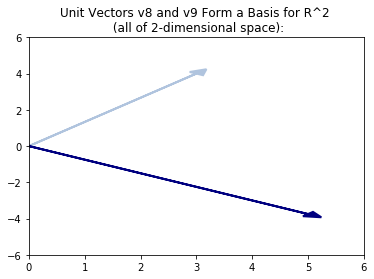

In [401]:
# To get two linearly independent vectors, let's just take v8 = [3, 4] 
# (arbitrary numbers) and solve for x in v9 = [5, x] to find an orthogonal vector.
v8 = np.array([3, 4])
v9 = np.array([5, -15/4])  # Calc:  0 = v8 · v9 = 3*5 + 4*x  -->  x = -15/4

# Check to make sure they are orthogonal (and therefore also linearly independent):
assert np.dot(v8, v9) == 0

# Plot them:
plt.arrow(0, 0, v8[0], v8[1], linewidth=2, color='lightsteelblue', head_width=0.3, head_length=0.3)
plt.arrow(0, 0, v9[0], v9[1], linewidth=2, color='navy', head_width=0.3, head_length=0.3)
plt.title('Unit Vectors v8 and v9 Form a Basis for R^2 \n (all of 2-dimensional space):')
plt.xlim(0, 6)
plt.ylim(-6, 6)
plt.show()

## 6.2 What does it mean to form a basis?

Vectors that form a basis for a subspace are a set of linearly independent vectors (no redundancy, i.e., no linearly dependent vectors) that span the entire subspace R^n (where n = however many dimensions they span).

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

**Answer:**

Rank:  3

The above matrix is the same matrix we reduced in 5.1 (above) to the following reduced row echelon form:

\begin{align}
P = \begin{bmatrix} 
1 & 0 & 0 \\
 0 & 1 & 0 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

--> So because its 3 row vectors are linearly independent, this matrix has a rank of 3 and a nullity of 0.

## 7.2 What does the rank of a matrix tell us?

The rank tells us the number of linearly independent row vectors (or column vectors, if reduced to echelon form by column operations) the matrix has -- i.e., if any of its rows are linearly dependent --> redundant information when used as a system of linear equations we want to solve.

# Stretch Goal #1:  Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v10 = np.array([1, 3])
w = np.array([-1, 2])

We can calculate the vector that is a projection of w onto Line L (where Line L is the span of vector v, i.e., the line y = 3x), as follows:

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

In [404]:
# Find the vector that is a projection of w onto Line L:
proj_w_on_L = np.dot(w, v10) / np.dot(v10, v10) * v10
proj_w_on_L

array([0.5, 1.5])

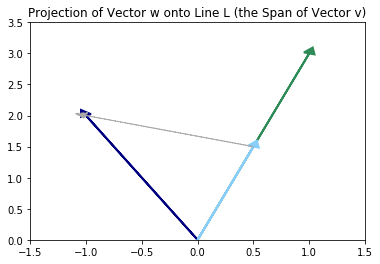

In [454]:
# Plot the vectors to see this visually:
orthog_connector_line = w - proj_w_on_L

plt.arrow(0, 0, v10[0], v10[1], linewidth=2, color='seagreen', head_width=0.1, head_length=0.1)
plt.arrow(0, 0, w[0], w[1], linewidth=2, color='navy', head_width=0.1, head_length=0.1)
plt.arrow(0, 0, proj_w_on_L[0], proj_w_on_L[1], linewidth=2, color='lightskyblue', head_width=0.1, head_length=0.1)
plt.arrow(proj_w_on_L[0], proj_w_on_L[1], orthog_connector_line[0], orthog_connector_line[1], linestyle='--', linewidth=1, color='darkgrey', head_width=0.1, head_length=0.1)
plt.title('Projection of Vector w onto Line L (the Span of Vector v)')
plt.xlim(-1.5, 1.5)
plt.ylim(0, 3.5)
plt.show()

# Check to make sure the gray line is actually orthogonal to Line L 
# (it doesn't look like a right angle on the below chart...), using the 
# Pythagorean Theorem:
assert np.linalg.norm(proj_w_on_L)**2 + np.linalg.norm(orthog_connector_line)**2 == np.linalg.norm(w)**2

# Stretch Goal #2:

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

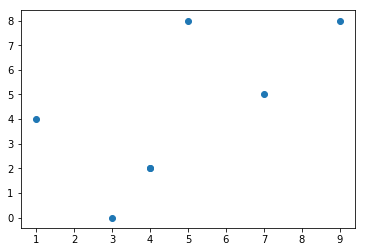

In [402]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()